In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Helper functions:

# Split the dataset in training and testing sets with respect to the given percentage
def splitter(X, Y, percent):
    X_train = X[:int(len(X)*percent)]
    Y_train = Y[:int(len(Y)*percent)]
    
    X_test = X[int(len(X)*percent):] 
    Y_test = Y[int(len(Y)*percent):]

    return X_train, Y_train, X_test, Y_test

## Confusion matrix
def get_confusion_matrix(Y, y_hat):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    # True Positive and False positive
    for l, p in zip(Y, y_hat):
        if l == 1 and p ==1:
            tp +=1
        if l == 0 and p == 1:
            fp +=1
        if l == 1 and p == 0:
            fn +=1
        if l == 0 and p == 0:
            tn +=1
    return tp, fp, tn, fn

## Precision
def precision(tp, fp):
    precision = tp / (tp + fp)
    return precision

## Recall
def recall(tp, fn):
    recall = tp / (tp + fn)
    return recall

## F-measure
def fScore(precision, recall):
    fscore = (2*precision*recall)/(precision + recall)
    return fscore

# sigmoid
def sigmoid(z):
    return 1 / (1+ np.exp(-(z)))

# Plot confusion matrix
def plotConfusionMatrix(cm):
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

# Plot learning curve
def plotLearningCurve(history):
    x = list(history.keys())
    y = list(history.values())
    plt.plot(x, y)
    plt.title("Curve plotted using the given x and y")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()


## Logistic Model Creation:

In [3]:
## Model
class LogisticRegAlex:
    def __init__(self):
        self.alpha = 0.5
        self.history = {}

    def train(self, X_train, Y_train, iteration):
        self.X_train = X_train
        self.Y_train = Y_train
        self.iteration = iteration
        self.W = np.zeros(X_train.shape[1])
        self.W = self.W.reshape(1,-1)

        #Training
        for i in range(self.iteration):
            self.Z = np.dot(self.W, self.X_train.T)
            self.y_hat = sigmoid(self.Z)
            self.y_hat = self.y_hat.reshape(-1,1)

            ### compute error
            # Multiply by 0.5 to make sure the model doesn't overfit
            self.cost = 0.5 * np.absolute(np.mean((np.dot(-Y_train, np.log(self.y_hat.T)) +  np.dot((1-self.Y_train), np.log(1-self.y_hat.T)))))

            #Print cost at i iterations:
            if i % 100 == 0 or i == 1000:
                # Save iterations and cos# plotConfusionMatrix(cm_train)t for plotting
                print(f'Cost: {self.cost}  at iteration {i}')
                self.history[i] = self.cost

            ## Compute gradient
            self.dJ_dW = 1/len(self.X_train)*np.dot((self.y_hat - self.Y_train).T, self.X_train)

            ## Update weight with gradient descent
            self.W = self.W - self.alpha * self.dJ_dW
        
        return self.W, self.history
    
    def test(self, X, Y):
        self.X = X
        self.Y = Y

        ### Predictions 
        self.z_test = np.dot(self.W, self.X.T)
        self.y_hat_test = sigmoid(self.z_test)

        # Threshold
        self.y_hat_test = [1 if p > 0.5 else 0 for i in self.y_hat_test for p in i ]

        # This will help us get a list of labels not a list of lists of labels
        self.Y = [y for i in self.Y for y in i]
        
        # Confusion Matrix
        self.tp, self.fp, self.tn, self.fn = get_confusion_matrix(self.Y, self.y_hat_test)

        ## Accuracy
        self.acc = (self.tp + self.tn)/ (self.tp+ self.tn + self.fp + self.fn )

        # precision
        self.pre = precision(self.tp, self.fp)

        # Recall
        self.rec = recall(self.tp, self.fn)

        #F-score
        self.fscore = fScore(self.pre, self.rec)

        # Confusion Matrix
        self.cm = [[self.tp,self.fp],[self.fn, self.tn]]
        self.cm = np.matrix(self.cm)
        
        self.scores = { 'accuracy': self.acc,'precision': self.pre, 'recall': self.rec, 'f1_score': self.fscore}

        return self.scores, self.cm

## Implementation of the model:


In [4]:
## Load datasets
X = pd.read_csv("features.csv")
Y = pd.read_csv("labels.csv")

Y.replace('ham', 0, inplace=True)
Y.replace('spam', 1, inplace=True)

X = np.array(X)
X = X.transpose()
Y = np.array(Y)

In [5]:
## split dataset
# train 80/20
X_train, Y_train, X_test, Y_test = splitter(X, Y, 0.8)

In [6]:
## Model Creation and Training
model1 = LogisticRegAlex()
W, history = model1.train(X_train, Y_train, 1000)

Cost: 0.1809775216476155  at iteration 0
Cost: 0.1823797266010098  at iteration 100
Cost: 0.1735612963867016  at iteration 200
Cost: 0.1642590887809743  at iteration 300
Cost: 0.15621977829384623  at iteration 400
Cost: 0.14948168336086734  at iteration 500
Cost: 0.1437922599234312  at iteration 600
Cost: 0.13890892865535553  at iteration 700
Cost: 0.13464676639434756  at iteration 800
Cost: 0.1308720172891839  at iteration 900


In [7]:
## Extract Metrics
scores_train, cm_train = model1.test(X_train, Y_train)
scores_test, cm_test = model1.test(X_test, Y_test)

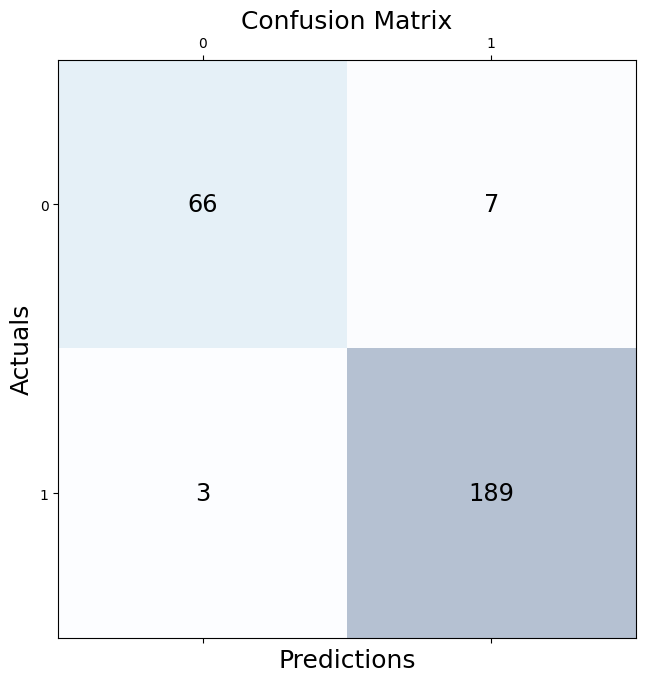

In [8]:
# Plot Confusion Matrix with Matplotlib
plotConfusionMatrix(cm_test)

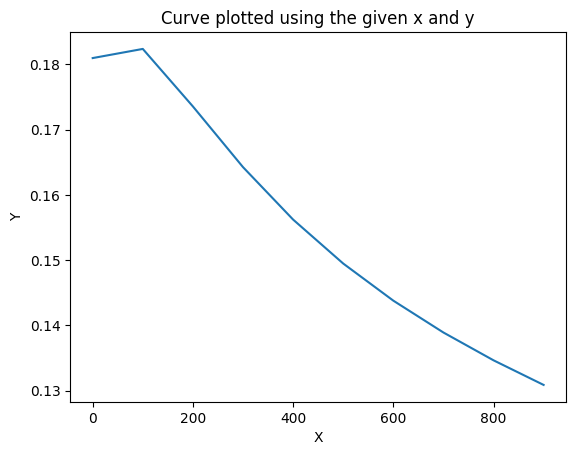

In [9]:
# Plot Learning Curve with matplotlib
plotLearningCurve(history)

In [10]:
# Print Metrics
print(f'Metrics on Training set: {scores_train}')
print(f'Metrics on Testing set: {scores_test}')

Metrics on Training set: {'accuracy': 0.9423984891406988, 'precision': 0.8453237410071942, 'recall': 0.9288537549407114, 'f1_score': 0.8851224105461392}
Metrics on Testing set: {'accuracy': 0.9622641509433962, 'precision': 0.9041095890410958, 'recall': 0.9565217391304348, 'f1_score': 0.9295774647887325}
